## Machine Leanring Modleing<br>
data load -> split data(test, train) -> learning -> predict -> check

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils.testing import all_estimators
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
import os
import pydot
from PIL import Image
import requests, zipfile, io
import time
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

%matplotlib inline

In [2]:
data = pd.read_csv("k:/sensor_report/data/data_ver2/data.csv", encoding='utf-8')
data = data.rename(columns = {'Unnamed: 0': 'index'})
data = data.drop(['Sum','Trans'], axis=1)
data = data.set_index('index')

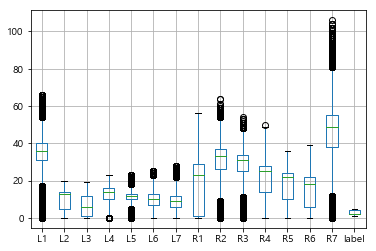

In [116]:
data.boxplot()

In [1]:
data.head(100)

NameError: name 'data' is not defined

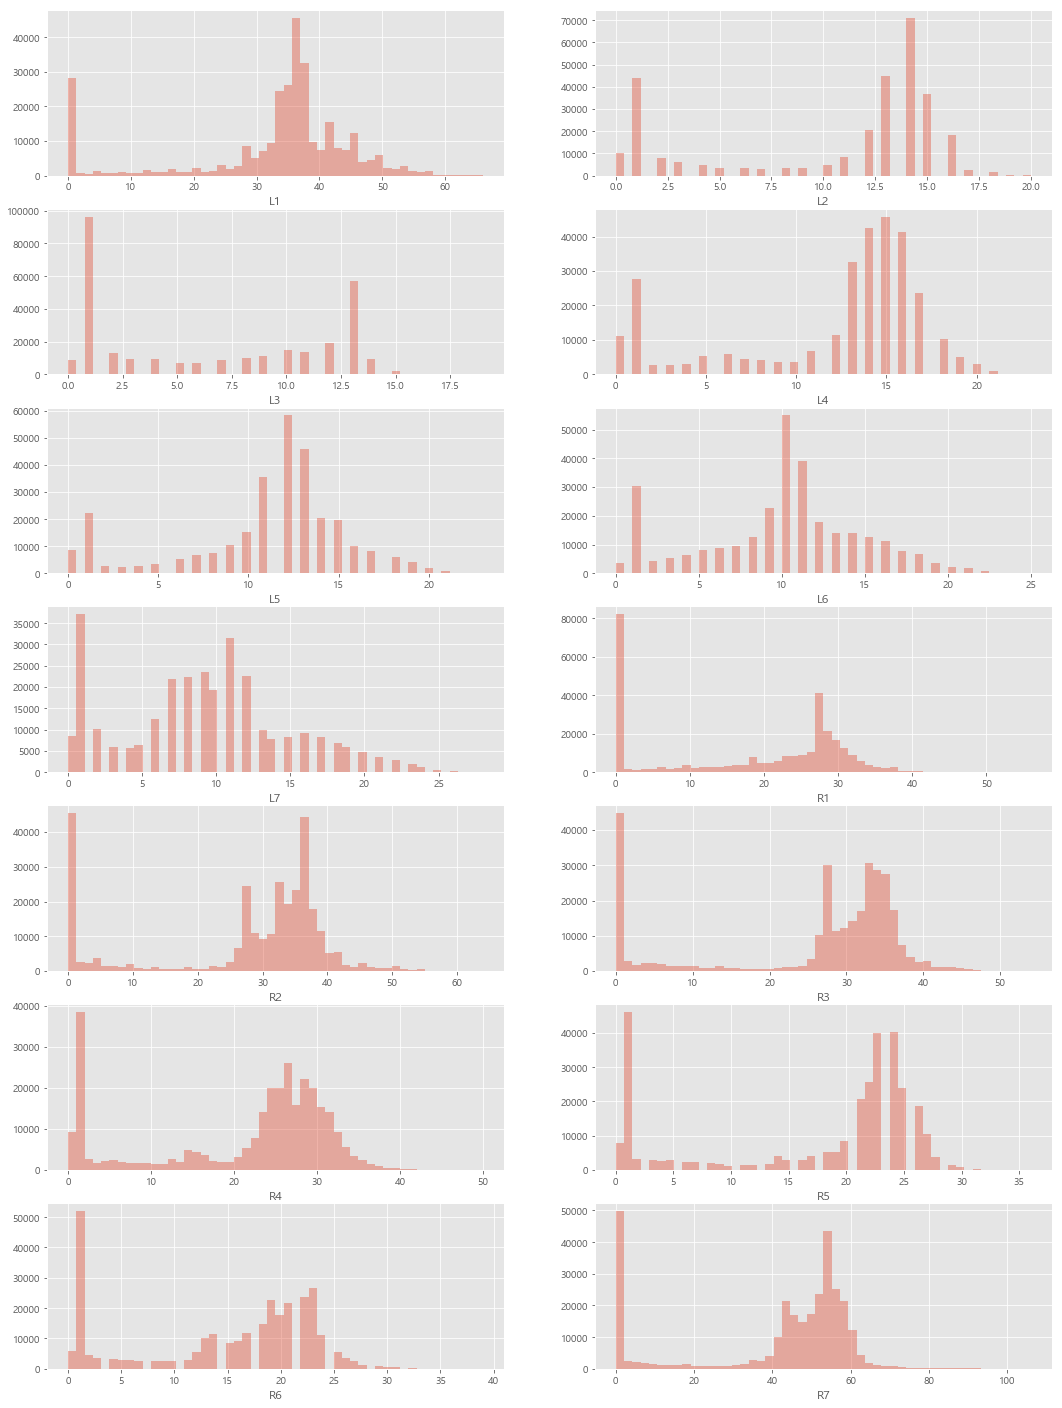

In [3]:
plt.style.use('ggplot')
figure,((ax1,ax2),
        (ax3,ax4),
        (ax5,ax6),
        (ax7,ax8),
        (ax9,ax10),
       (ax11,ax12),
       (ax13,ax14),)=plt.subplots(nrows=7,ncols=2)
figure.set_size_inches(18,25)

#값확인 후 이상값 수정
sns.distplot(data['L1'],ax=ax1, kde=False)
sns.distplot(data['L2'],ax=ax2, kde=False)
sns.distplot(data['L3'],ax=ax3, kde=False)
sns.distplot(data['L4'],ax=ax4, kde=False)
sns.distplot(data['L5'],ax=ax5, kde=False)
sns.distplot(data['L6'],ax=ax6, kde=False)
sns.distplot(data['L7'],ax=ax7, kde=False)
sns.distplot(data['R1'],ax=ax8, kde=False)
sns.distplot(data['R2'],ax=ax9, kde=False)
sns.distplot(data['R3'],ax=ax10, kde=False)
sns.distplot(data['R4'],ax=ax11, kde=False)
sns.distplot(data['R5'],ax=ax12, kde=False)
sns.distplot(data['R6'],ax=ax13, kde=False)
sns.distplot(data['R7'],ax=ax14, kde=False)

#저장하기 ax.figure.savefig('lm.png')

In [112]:
data['label'].value_counts()

2.0    89893
1.0    61345
4.0    49090
5.0    49079
3.0    49025
Name: label, dtype: int64

In [3]:
y = data.loc[:,"label"]

In [4]:
x = data.loc[:,["L1","L2","L3","L4",'L5','L6','L7','R1','R2','R3','R4','R5','R6','R7']]

In [5]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,
                                                  train_size = 0.8, shuffle=True)

In [104]:
start_time =time.time()
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
pred=dt_clf.predict(x_test)
print('예측정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))
#DecisioinTreeClassifier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 수행시간 : {0:1.4f}초".format(time.time()-start_time))
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

예측정확도:0.9475
DecisionTreeClassifier 수행시간 : 1.5330초
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


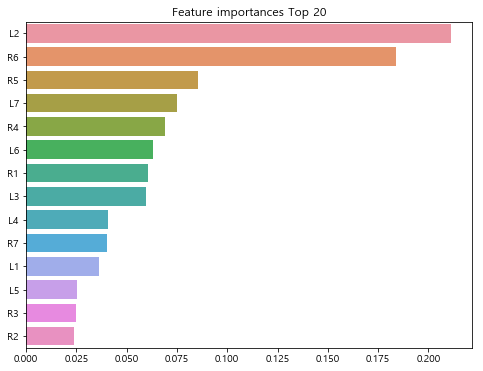

In [118]:
#특성값 중 상위 20위 확인
ftr_importances_values=dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

In [105]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트 학습 및 별도의 테스트 세트로 예측성능평가
start_time =time.time()
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤포레스트 정확도 : {0:.4f}'.format(accuracy))
print("RandomForestClassifier 수행시간 : {0:1.4f}초".format(time.time()-start_time))
print('랜덤포레스트 기본 하이퍼 파라미터:\n',rf_clf.get_params())

랜덤포레스트 정확도 : 0.9541
RandomForestClassifier 수행시간 : 3.2130초
랜덤포레스트 기본 하이퍼 파라미터:
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


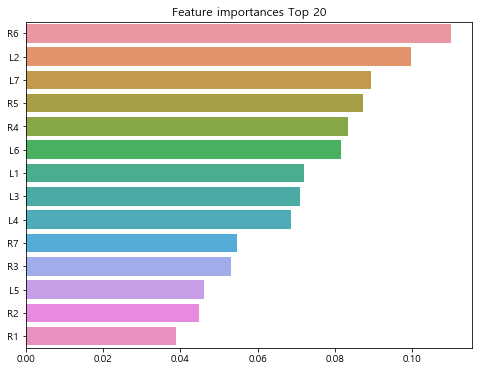

In [119]:
#특성값 중 상위 20위 확인
ftr_importances_values=rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
#GBM의 시간 측정을 위함 시작시간 설정
start_time =time.time()
#GBM모델 셋업
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train,y_train)
gb_pred=gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GradientBoostingClassifier 정확도:{0:.4f}'.format(gb_accuracy))
print("GradientBoostingClassifier 수행시간 : {0:1.4f}초".format(time.time()-start_time))
print('GradientBoostingClassifier 기본 하이퍼 파라미터:\n',gb_clf.get_params())

GradientBoostingClassifier 정확도:0.8632
GradientBoostingClassifier 수행시간 : 163.1710초
GradientBoostingClassifier 기본 하이퍼 파라미터:
 {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


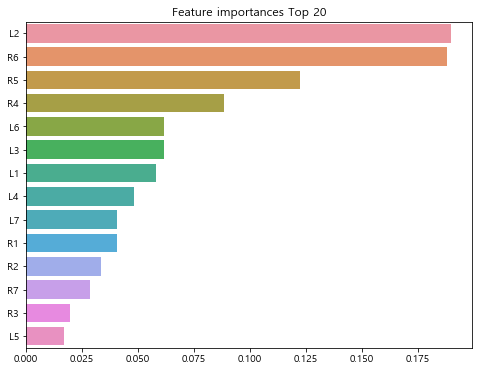

In [120]:
#특성값 중 상위 20위 확인
ftr_importances_values=gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

In [107]:
#사이킷런 래퍼 SGBoost 클래스인 XGBClassifier임포트
from xgboost import XGBClassifier
start_time =time.time()
xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(x_train,y_train)
pred = xgb_clf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print('XGBClassifier 정확도:{0:.4f}'.format(accuracy))
print("XGBClassifier 수행시간 : {0:1.4f}초".format(time.time()-start_time))
print('XGBClassifier 기본 하이퍼 파라미터:\n',xgb_clf.get_params())

XGBClassifier 정확도:0.8355
XGBClassifier 수행시간 : 51.2580초
XGBClassifier 기본 하이퍼 파라미터:
 {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


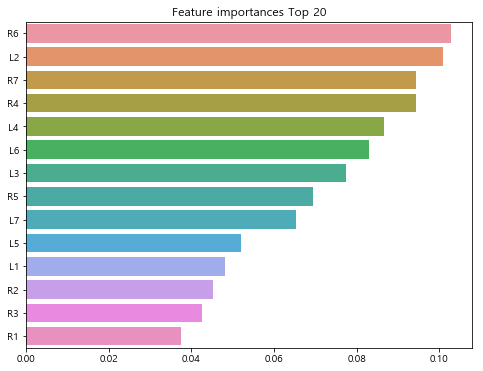

In [121]:
#특성값 중 상위 20위 확인
ftr_importances_values=xgb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

## LGBM 적용

In [108]:
from lightgbm import LGBMClassifier
start_time =time.time()
lgbm_clf = LGBMClassifier(random_state=0)
lgbm_clf.fit(x_train, y_train)
pred = lgbm_clf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print('LGBMClassifier 정확도:{0:.4f}'.format(accuracy))
print("LGBMClassifier 수행시간 : {0:1.4f}초".format(time.time()-start_time))
print('LGBMClassifier 기본 하이퍼 파라미터:\n',lgbm_clf.get_params())

LGBMClassifier 정확도:0.9107
LGBMClassifier 수행시간 : 5.4130초
LGBMClassifier 기본 하이퍼 파라미터:
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


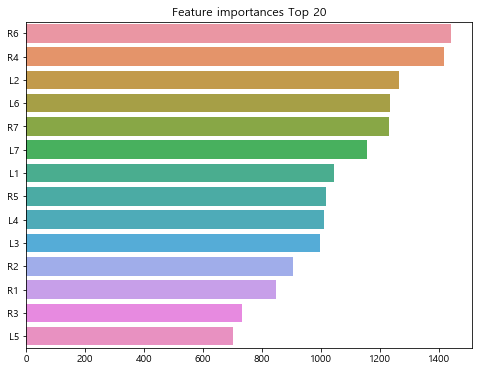

In [122]:
#특성값 중 상위 20위 확인
ftr_importances_values=lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

In [4]:
all_Algorithms = all_estimators(type_filter='classifier')

In [20]:
len(all_Algorithms) # 0~30

31

In [35]:
all_Algorithms[9]

('GaussianProcessClassifier',
 sklearn.gaussian_process.gpc.GaussianProcessClassifier)

## 전체 알고리즘 모델

In [26]:
for (name, algorithm) in all_Algorithms[0:9]:
    clf=algorithm()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name, "의 정답률", accuracy_score(y_test,y_pred))

AdaBoostClassifier 의 정답률 0.6496054417209778
BaggingClassifier 의 정답률 0.9542781510211604
BernoulliNB 의 정답률 0.3499924606698276
CalibratedClassifierCV 의 정답률 0.6080721095045822
ComplementNB 의 정답률 0.45437029838993415
DecisionTreeClassifier 의 정답률 0.9474759997989511
ExtraTreeClassifier 의 정답률 0.9360664801380535
ExtraTreesClassifier 의 정답률 0.9561713605977851
GaussianNB 의 정답률 0.6281602358972641


In [40]:
# 9번 알고리즘은 데이터 계수의 제한으로 정답률 확인 불가하여 Pass
#from sklearn.gaussian_process import GaussianProcessClassifier
#gpc_clf = GaussianProcessClassifier(random_state=0)
#gpc_clf.fit(x_train, y_train)
#pred = gpc_clf.predict(x_test)
#accuracy=accuracy_score(y_test,pred)
#print(name, "의 정답률", accuracy_score(y_test,y_pred))

In [43]:
for (name, algorithm) in all_Algorithms[10:12]: # 9 memory error
    clf=algorithm()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name, "의 정답률", accuracy_score(y_test,y_pred))

GradientBoostingClassifier 의 정답률 0.8641747784274633
KNeighborsClassifier 의 정답률 0.9393167691457102


In [45]:
for (name, algorithm) in all_Algorithms[14:19]: # 12,13 memory error
    clf=algorithm()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name, "의 정답률", accuracy_score(y_test,y_pred))

LinearDiscriminantAnalysis 의 정답률 0.5850855295122891
LinearSVC 의 정답률 0.5535041131234607
LogisticRegression 의 정답률 0.6423676847554743
LogisticRegressionCV 의 정답률 0.6422001440849766
MLPClassifier 의 정답률 0.9046190962856233


In [52]:
for (name, algorithm) in all_Algorithms[19:25]: 
    clf=algorithm()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name, "의 정답률", accuracy_score(y_test,y_pred))

MultinomialNB 의 정답률 0.4461943136696433
NearestCentroid 의 정답률 0.4877779080871882
NuSVC 의 정답률 0.769212726389331
PassiveAggressiveClassifier 의 정답률 0.45824048787843247
Perceptron 의 정답률 0.517901720642686
QuadraticDiscriminantAnalysis 의 정답률 0.7843919111364284


In [54]:
for (name, algorithm) in all_Algorithms[26:30]: #25  no Neighbor
    clf=algorithm()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name, "의 정답률", accuracy_score(y_test,y_pred))

RandomForestClassifier 의 정답률 0.9547305108315044
RidgeClassifier 의 정답률 0.5629701610065844
RidgeClassifierCV 의 정답률 0.5629701610065844
SGDClassifier 의 정답률 0.5932280060984804


In [9]:
from sklearn.svm import SVC
start_time =time.time()
svm_clf = SVC(kernel = 'rbf', class_weight = 'balanced', random_state=0)
svm_clf.fit(x_train,y_train)
pred = svm_clf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print('Support Vector Classidier 정확도:{0:.4f}'.format(accuracy))
print("SVClassifier 수행시간 : {0:1.4f}초".format(time.time()-start_time))

Support Vector Classidier 정확도:0.9503
SVClassifier 수행시간 : 7408.1404초


In [11]:
from sklearn.svm import NuSVC
start_time =time.time()
nsvm_clf = NuSVC(random_state=0)
nsvm_clf.fit(x_train,y_train)
pred = nsvm_clf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print('NuSupport Vector Classidier 정확도:{0:.4f}'.format(accuracy))
print("NuSVClassifier 수행시간 : {0:1.4f}초".format(time.time()-start_time))

NuSupport Vector Classidier 정확도:0.7697
NuSVClassifier 수행시간 : 9565.8067초


## Learning curve 구현하기
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html<br><br>
https://brunch.co.kr/@chris-song/32

# 데이터 분포도

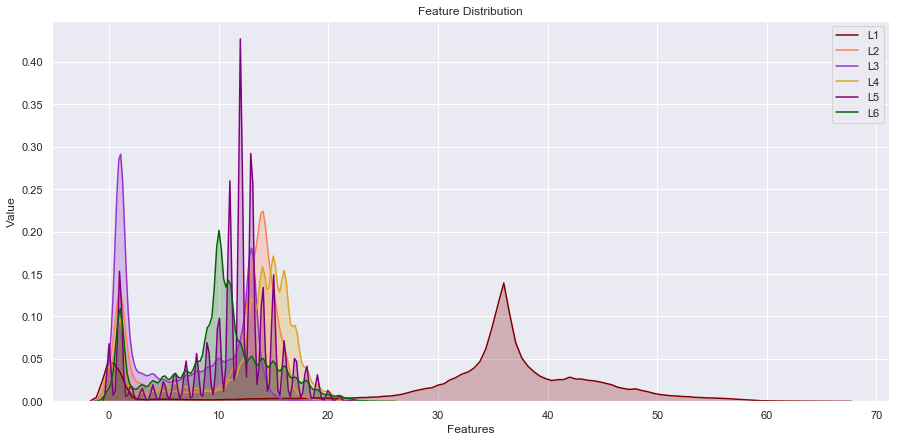

In [57]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in x.columns[0:6]:
    index = index + 1
    fig = sns.kdeplot(x[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

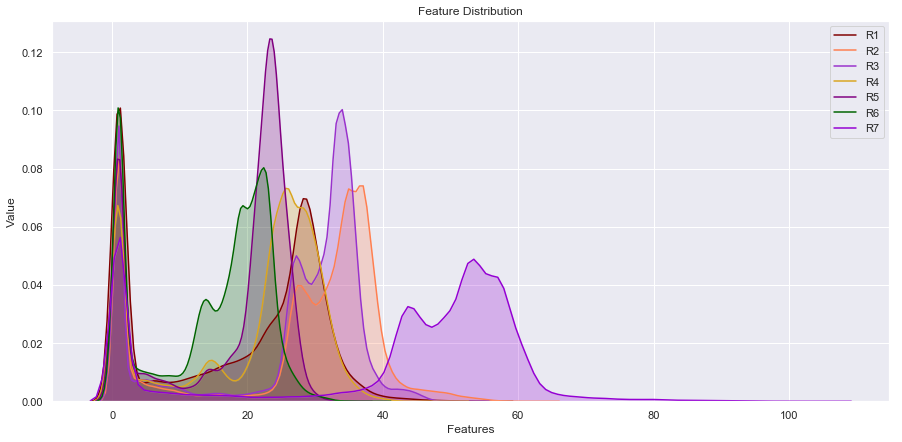

In [59]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in x.columns[7:14]:
    index = index + 1
    fig = sns.kdeplot(x[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

In [97]:
data.head(3)
#https://github.com/deadskull7/Human-Activity-Recognition-with-Neural-Network-using-Gyroscopic-and-Accelerometer-variables/blob/master/Human%20Activity%20Recognition%20(97.98%20%25).ipynb

,L1,L2,L3,L4,L5,L6,L7,R1,R2,R3,R4,R5,R6,R7,label
index,,,,,,,,,,,,,,,
0,44.0,15.0,1.0,13.0,8.0,4.0,13.0,32.0,40.0,36.0,24.0,29.0,22.0,44.0,1.0
1,43.0,15.0,1.0,13.0,8.0,4.0,13.0,32.0,40.0,36.0,24.0,29.0,22.0,46.0,1.0
2,43.0,15.0,1.0,12.0,8.0,4.0,13.0,33.0,40.0,36.0,24.0,28.0,22.0,46.0,1.0


In [139]:
label = y

In [140]:
tsne_data = data.copy()


In [141]:
scl = StandardScaler()

In [142]:
tsne_data = scl.fit_transform(tsne_data)

In [144]:
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

In [145]:
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

In [146]:
### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

## 행동(label)별 데이터 산점도 T-nse 적용

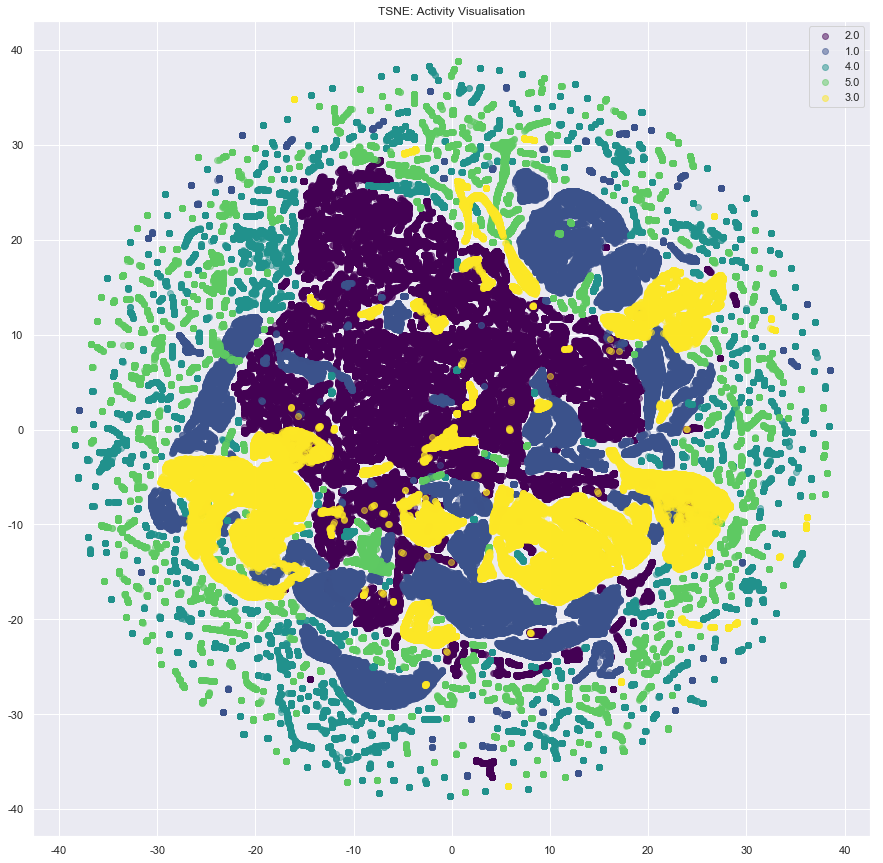

In [148]:
label_counts = label.value_counts()
plt.figure(figsize=(15,15))
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    plt.scatter(x=tsne_transformed[mask][:,0],
                y=tsne_transformed[mask][:,1],
                c=colors[i], alpha=0.5, label=group)
plt.title('TSNE: Activity Visualisation')
plt.legend()
plt.show()

In [127]:
"""sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='Activity', y= df.loc[df['subject']==15].iloc[:,7],
                     data= df.loc[df['subject']==15], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)"""
#subject 는 실험자 번호.. 우리 실험에서도 가능
# 해당 그래프는 실험자의 압력센서 데이터의 각 label 분포를 나타냄.

KeyError: 'subject'

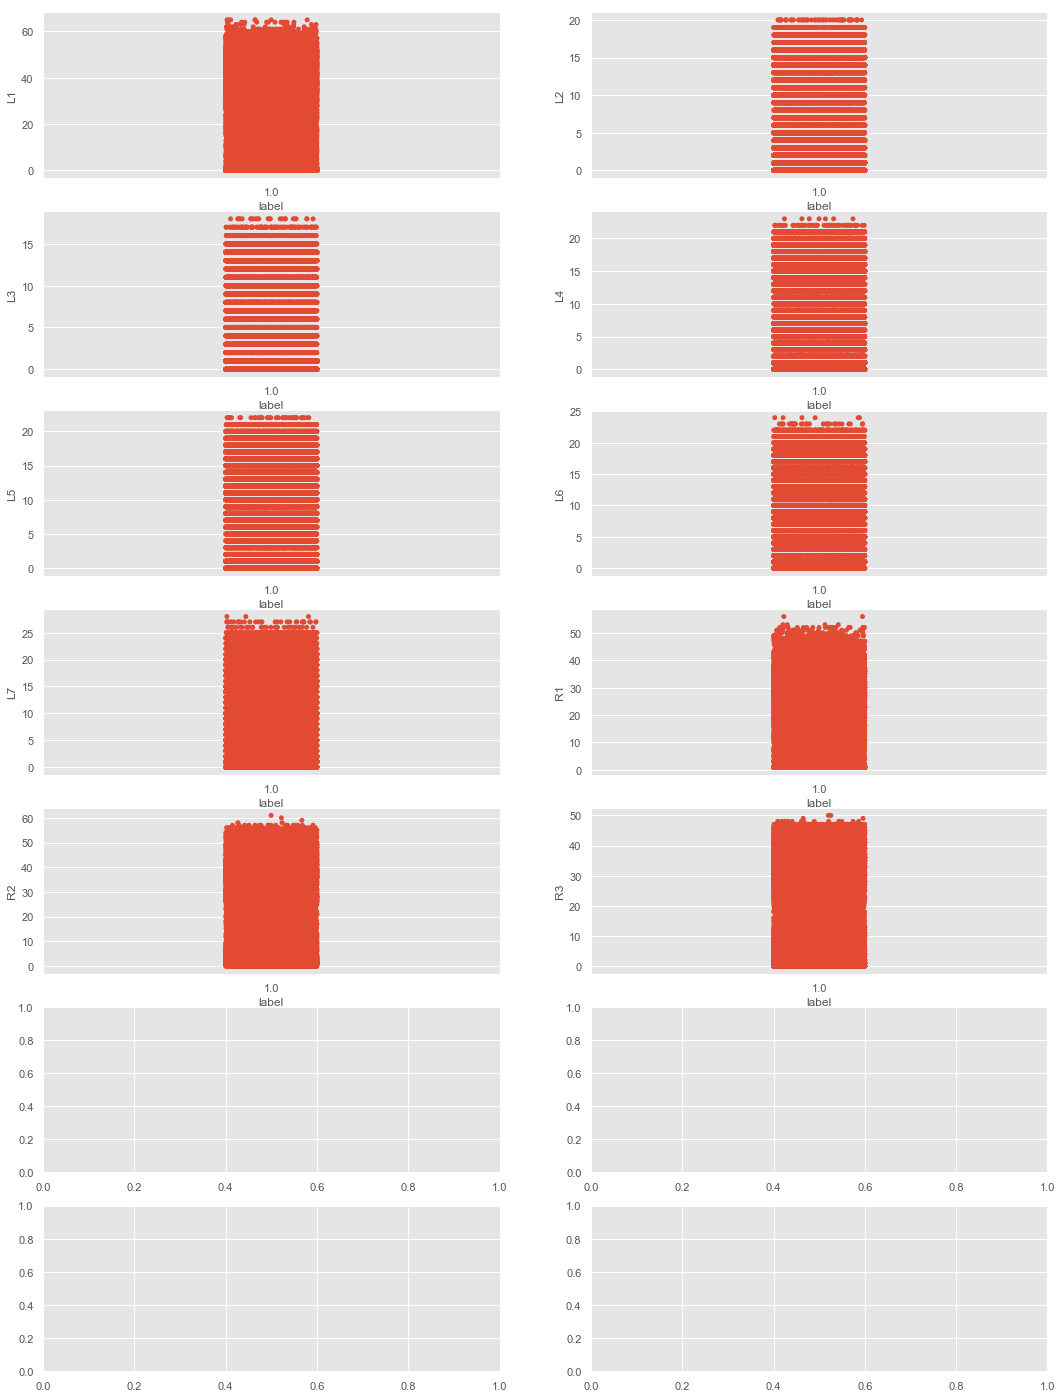

In [126]:
#행동에 대한 압력센서의 분포도 : 산점도, 다른 그림으로 표현되어서 굳이?
"""plt.style.use('ggplot')
figure,((ax1,ax2),
        (ax3,ax4),
        (ax5,ax6),
        (ax7,ax8),
        (ax9,ax10),
       (ax11,ax12),
       (ax13,ax14),)=plt.subplots(nrows=7,ncols=2)
figure.set_size_inches(18,25)

sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,0], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax1)
sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,1], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax2)
sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,2], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax3)
sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,3], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax4)
sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,4], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax5)
sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,5], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax6)
sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,6], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax7)
sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,7], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax8)
sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,8], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax9)
sns.stripplot(x="label", y=df.loc[df['label']==1.0].iloc[:,9], 
                     data=df.loc[df['label']==1.0], jitter=True, ax=ax10)

sns.stripplot(x='label', y= df.loc[df['subject']==15].iloc[:,7],
                     data= df.loc[df['subject']==15], jitter=True)
"""

In [ ]:
start_time =time.time()
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
pred=dt_clf.predict(x_test)
print('예측정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))
#DecisioinTreeClassifier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 수행시간 : {0:1.4f}초".format(time.time()-start_time))
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

In [7]:
from sklearn.hmm import GMMHMM

ModuleNotFoundError: No module named 'sklearn.hmm'